In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import multivariate_normal
from utils import utils 

seed = 42

# Define sample sizes and number of runs
sample_sizes = [50, 100, 150, 200, 250, 300]
num_outer_runs = 100 # Number of times to repeat the experiment for each sample size
significance_level = 0.05

/Users/aditya/Documents/GitHub/AR-Projects/Experiments/mMMD/mMMD_typeI_over_samples/betMMD_utils.py:182: SyntaxWarning: invalid escape sequence '\l'
  K_{t} = K_{t-1} \times (1 + \lambda_t F_t),


In [2]:
from scipy.stats import multivariate_normal
import numpy as np

# Parameters
d = 10           # Dimension
j = 5           # Number of coordinates to shift
epsilon = 0  # Mean shift in first j coordinates

# Mean vectors
x_mean = np.zeros(d)
y_mean = np.zeros(d)
y_mean[:j] = epsilon  # Apply shift to first j coordinates

# Covariance matrices
x_cov = y_cov = np.eye(d)

# Define distributions
X_distribution = multivariate_normal(mean=x_mean, cov=x_cov)
Y_distribution = multivariate_normal(mean=y_mean, cov=y_cov)

# betting_args = {'d':d, 'j':j, 'epsilon':epsilon}

betting_args = None


In [3]:
# Compute empirical power over sample sizes
power_results = compute_power_over_sample_sizes(
    X_distribution, Y_distribution, sample_sizes, num_outer_runs, significance_level, Kernel = RBF_Kernel, betting_args = betting_args, seed = seed
)

Sample size 300: 100%|██████████| 100/100 [12:49<00:00,  7.70s/it]


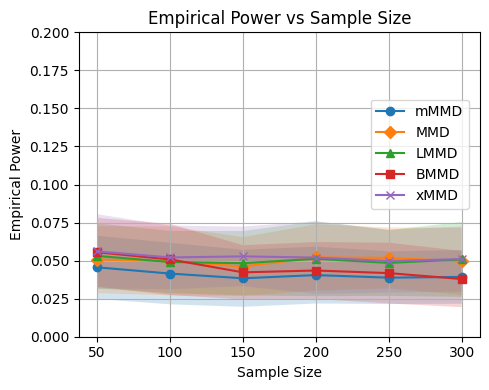

In [ ]:
test_names = [k for k in power_results]
markers = ['o', 'D', '^', 's', 'x' ,'*']

custom_labels = {
    'mmd': 'MMD',
    'mMMD': 'mMMD',
    'LMMD': 'LMMD',
    'BTest': 'BMMD',
    'CrossMMD': 'xMMD',
    'BetMMD': 'BetMMD'
}

plt.figure(figsize=(5, 4))

for i, test_name in enumerate(test_names):
    results = power_results[test_name]
    means = np.array(results['mean'])
    stds = np.array(results['std'])
    lower = means - stds
    upper = means + stds

    plt.plot(sample_sizes, means, 
             label=custom_labels.get(test_name, test_name),
             marker=markers[i % len(markers)])
    plt.fill_between(sample_sizes, lower, upper, alpha=0.2)

plt.xlabel("Sample Size")
plt.ylabel("Empirical Power")
plt.title("Empirical Power vs Sample Size")

# Set y-axis range
plt.ylim(0, 0.2)

plt.legend(loc="center", bbox_to_anchor=(0.85, 0.6))
plt.grid(True)

plt.tight_layout()
plt.savefig("results/empirical_typeI_vs_sample_size_gaussian_mean_d_10_large_sample.pdf", dpi=1200)
plt.show()


In [7]:
from scipy.stats import multivariate_normal
import numpy as np

sample_sizes = [30, 50, 70, 90, 110]

# Parameters
d = 10           # Dimension
j = 5           # Number of coordinates to shift
epsilon = 0  # Mean shift in first j coordinates

# Mean vectors
x_mean = np.zeros(d)
y_mean = np.zeros(d)
y_mean[:j] = epsilon  # Apply shift to first j coordinates

# Covariance matrices
x_cov = y_cov = np.eye(d)

# Define distributions
X_distribution = multivariate_normal(mean=x_mean, cov=x_cov)
Y_distribution = multivariate_normal(mean=y_mean, cov=y_cov)

# betting_args = {'d':d, 'j':j, 'epsilon':epsilon}

betting_args = None


In [8]:
# Compute empirical power over sample sizes
power_results = compute_power_over_sample_sizes(
    X_distribution, Y_distribution, sample_sizes, num_outer_runs, significance_level, Kernel = RBF_Kernel, betting_args = betting_args, seed = seed
)

Sample size 110: 100%|██████████| 100/100 [01:28<00:00,  1.13it/s]


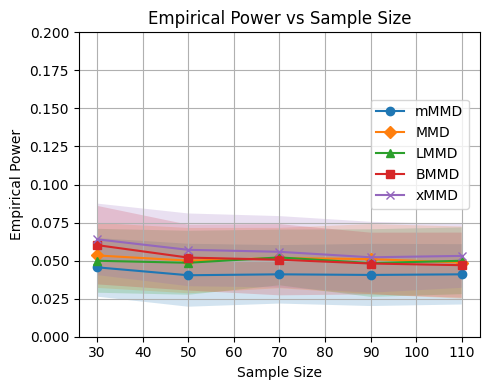

In [ ]:
test_names = [k for k in power_results]
markers = ['o', 'D', '^', 's', 'x', '*']

custom_labels = {
    'mmd': 'MMD',
    'mMMD': 'mMMD',
    'LMMD': 'LMMD',
    'BTest': 'BMMD',
    'CrossMMD': 'xMMD'
}

plt.figure(figsize=(5, 4))

for i, test_name in enumerate(test_names):
    results = power_results[test_name]
    means = np.array(results['mean'])
    stds = np.array(results['std'])
    lower = means - stds
    upper = means + stds

    plt.plot(sample_sizes, means, 
             label=custom_labels.get(test_name, test_name),
             marker=markers[i % len(markers)])
    plt.fill_between(sample_sizes, lower, upper, alpha=0.2)

plt.xlabel("Sample Size")
plt.ylabel("Empirical Power")
plt.title("Empirical Power vs Sample Size")

# Set y-axis range
plt.ylim(0, 0.2)
plt.legend(loc = "center", bbox_to_anchor = (0.85,0.6))
plt.grid(True)

plt.tight_layout()
plt.savefig("results/empirical_typeI_vs_sample_size_gaussian_mean_d_10_small_sample.pdf", dpi=1200)
plt.show()
